# Preliminary multiyear mixing analysis for NSF proposal

In [ ]:
dsets = [
    xr.open_dataset(f, decode_times=False)
    for f in [
        "../TPOS_MITgcm_fix3//STATION_DATA/Day_7251-7297/Station_0.250_-140.000.nc",
        "../TPOS_MITgcm_fix3//STATION_DATA/Day_7251-7297/Station_-0.750_-140.000.nc",
        "../TPOS_MITgcm_fix3//STATION_DATA/Day_7251-7297/Station_-0.950_-140.000.nc",
        "../TPOS_MITgcm_fix3//STATION_DATA/Day_7251-7297/Station_0.050_-140.000.nc",
    ]
]

In [ ]:
import dask_jobqueue

if "client" in locals():
    client.close()
if "cluster" in locals():
    cluster.close()

env = {"OMP_NUM_THREADS": "3", "NUMBA_NUM_THREADS": "3"}

# cluster = distributed.LocalCluster(
#    n_workers=8,
#    threads_per_worker=1,
#    env=env
# )

if "cluster" in locals():
    del cluster
    
cluster = dask_jobqueue.SLURMCluster(
    cores=1,
    processes=1,
    memory="25GB",
    walltime="08:00:00",
    project="NCGD0046",
    scheduler_options=dict(dashboard_address=":9797"),
)
# cluster = dask_jobqueue.PBSCluster(
#    cores=9, processes=9, memory="108GB", walltime="02:00:00", project="NCGD0043",
#    env_extra=env,
# )

cluster.scale(4)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
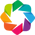

2.14.0
2.14.0
0.16.1.dev4+g1be777fe7


<xarray.DataArray (dim_0: 1)>
array([1.])
Dimensions without coordinates: dim_0

In [ ]:
# %load_ext autoreload
# %autoreload 2

%matplotlib inline

import dask
import distributed
import holoviews as hv
import hvplot.xarray
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.units as munits
import numpy as np
import pandas as pd
import seawater as sw
import cf_xarray
import xarray as xr
from holoviews import opts

import dcpy
import pump

# import hvplot.xarray


# import facetgrid

mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.bbox"] = "tight"
mpl.rcParams["figure.dpi"] = 140

munits.registry[np.datetime64] = mdates.ConciseDateConverter()

xr.set_options(keep_attrs=True)


hv.extension("bokeh")
# hv.opts.defaults(opts.Image(fontscale=1.5), opts.Curve(fontscale=1.5))


print(dask.__version__)
print(distributed.__version__)
print(xr.__version__)

xr.DataArray([1.0])

In [ ]:
client = distributed.Client(cluster)
client

<Client: 'tcp://10.12.205.12:38216' processes=4 threads=4, memory=100.00 GB>

In [ ]:
metrics = pump.model.model.read_metrics("/glade/u/home/dcherian/pump/TPOS_MITgcm_fix3/")

In [ ]:
station = pump.model.model.read_stations_20(
    "/glade/u/home/dcherian/pump/TPOS_MITgcm_fix3/", "*_0.05*140.000*.nc", dayglobstr="*"
) 
station

<xarray.Dataset>
Dimensions:        (depth: 185, time: 175125)
Coordinates:
  * depth          (depth) float32 -1.25 -3.75 -6.25 ... -5658.0986 -5758.0986
    longitude      float32 -140.025
    latitude       float32 0.025
  * time           (time) datetime64[ns] 1998-12-31T18:00:00 ... 2018-12-23T1...
    zeuc           (depth, time) float32 122.5 122.5 ... -5629.3486 -5626.8486
Data variables:
    SSH            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    KPPhbl         (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    u              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    v              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    w              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    theta          (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    salt           (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    DFrI_TH        (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    VISrI_Um       (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    VISrI_Vm       (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPdiffKzT     (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPviscAz      (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPg_TH        (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    Jq             (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    nonlocal_flux  (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    dens           (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    mld            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    eucmax         (time) float32 -123.75 -123.75 -123.75 ... -128.75 -131.25
    dJdz           (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    dTdt           (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
Attributes:
    title:     Station profile, index (i,j)=(600,241)
    easting:   longitude
    northing:  latitude

In [ ]:
station = station.persist()

In [ ]:
season = (
    station.Jq.groupby("time.season")
    .mean()
    .compute()
    .reindex(season=["DJF", "MAM", "JJA", "SON"])
)

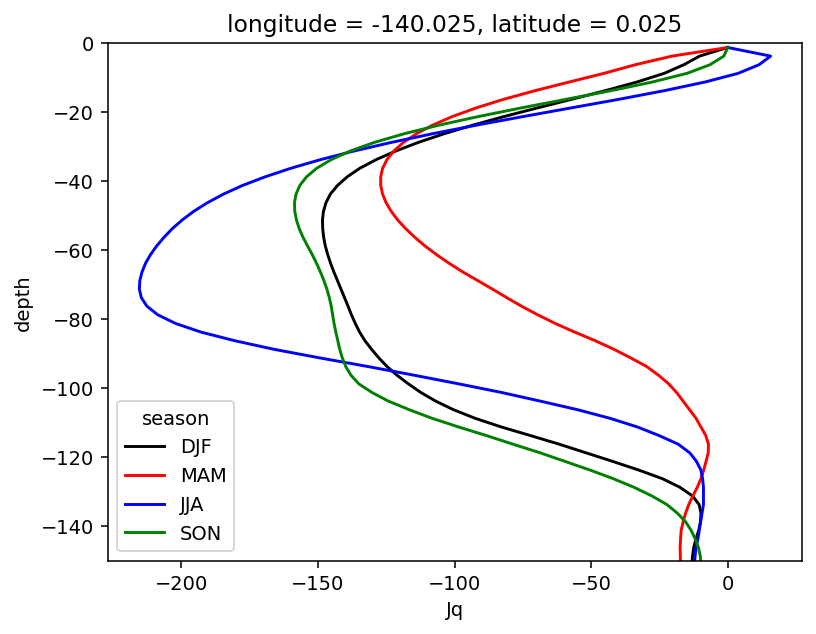

In [ ]:
from cycler import cycler

default_cycler = cycler(color=['k', 'r', 'b', 'g'])

with plt.rc_context({'axes.prop_cycle': default_cycler}):
    (season).plot(hue="season", y="depth", ylim=(-150, 0))

# Simple check

([<matplotlib.lines.Line2D at 0x2ba55626fe10>],
 Text(2008-11-30T23:00:00.000000000, -116.25, '  $z_{EUC}$'))

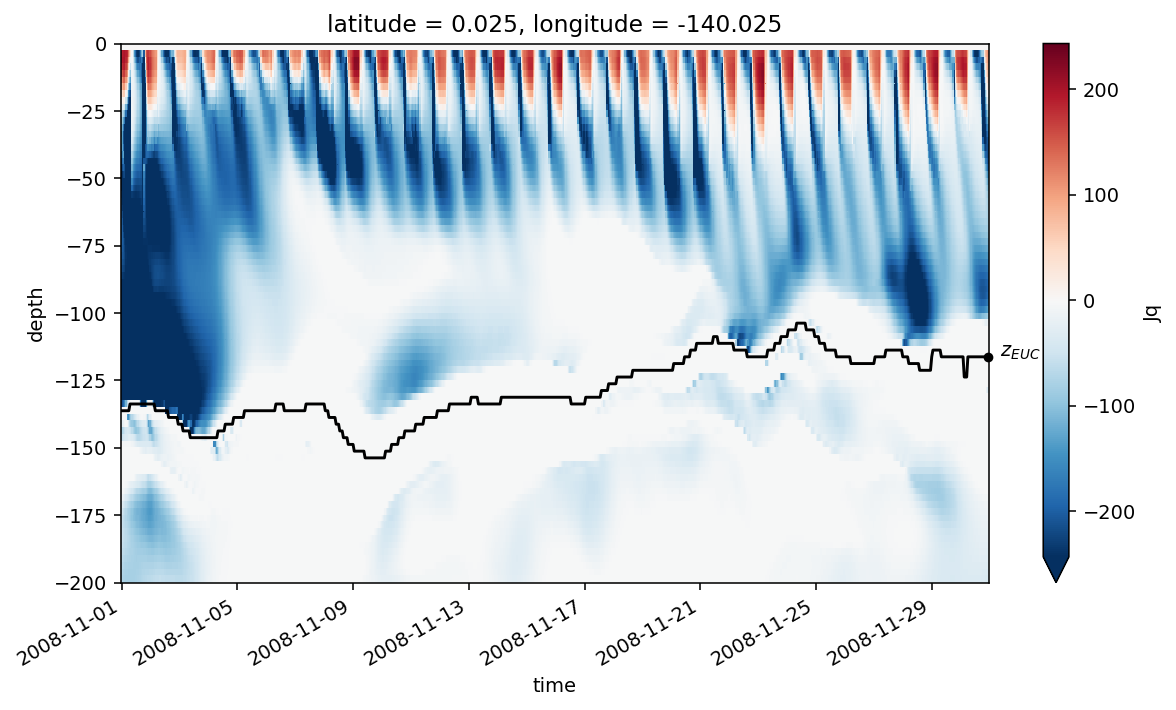

In [ ]:
station.Jq.sel(time="2008-Nov").plot(y="depth", robust=True, ylim=(-200, 0), size=5, aspect=2)
hdl = station.eucmax.sel(time="2008-Nov").plot(x="time", color='k', _labels=False)
dcpy.plots.annotate_end(hdl[0], "$z_{EUC}$")

# Simple time-mean

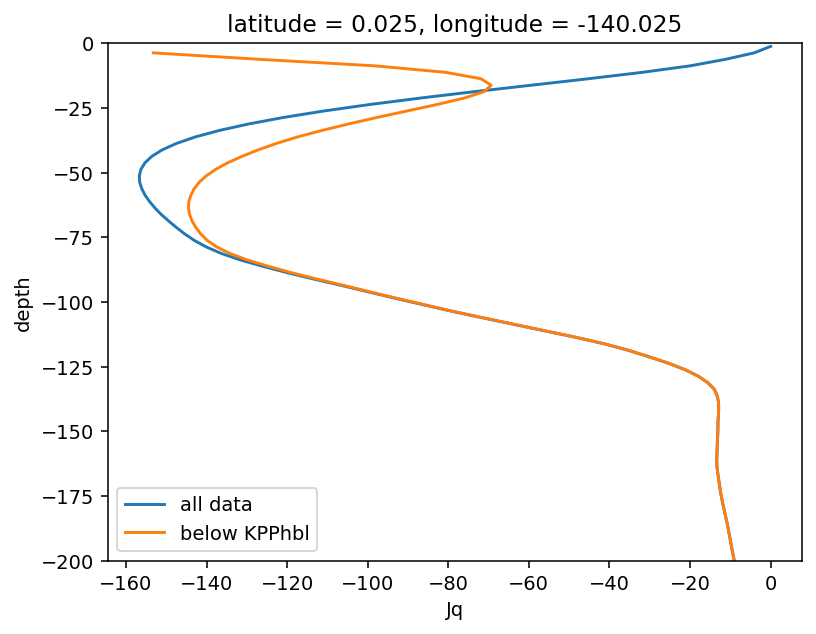

In [ ]:
station.Jq.mean("time").plot(y="depth", ylim=(-200, 0))
station.where(station.depth < -station.KPPhbl).Jq.mean("time").plot(
    y="depth", ylim=(-200, 0)
)
plt.legend(("all data", "below KPPhbl"))

# Heat flux in EUC-relative frame

In [ ]:
subset = station #.sel(time="2003")
# subset = subset.where(subset.depth < -subset.KPPhbl)

xr.set_options(keep_attrs=True)

regridded = dcpy.interpolate.bin_to_new_coord(subset[["Jq", "dJdz", "dTdt", "u"]], "depth", "zeuc", edges = np.arange(-202.5, 202.5, 5)).persist()
regridded.zeuc.attrs = station.zeuc.attrs
regridded.dTdt.attrs = station.dTdt.attrs

## Time-mean profile in euc-relative frame

Text(0.5, 0, '$J_q^t [W/m²]$')

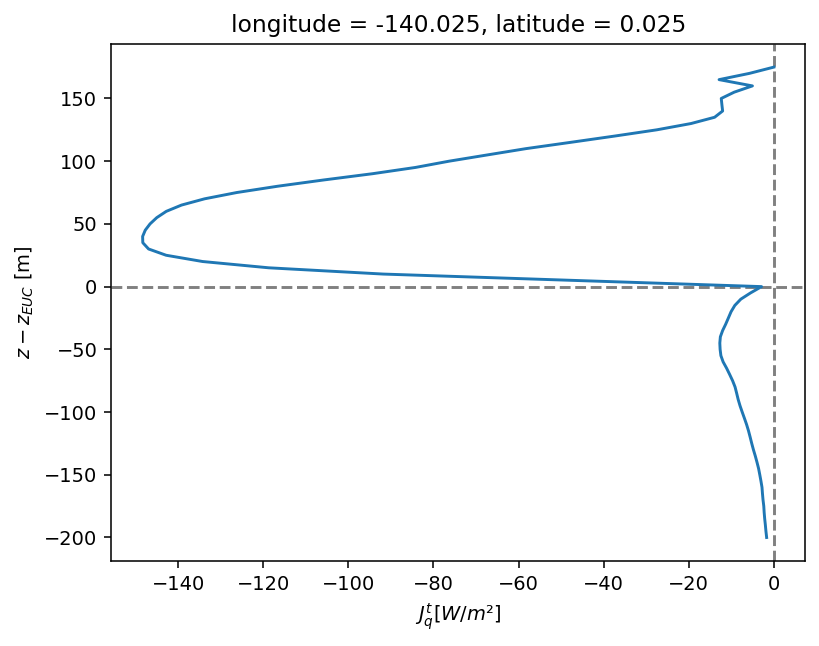

In [ ]:
regridded.Jq.mean("time").plot(y="zeuc")
dcpy.plots.liney(0)
dcpy.plots.linex(0)

plt.gca().set_xlabel("$J_q^t [W/m²]$")
# plt.gca().set_ylabel("$z - z_{euc} [m]$")

In [ ]:
12/1000/4000 * 30 * 86400

7.776000000000001

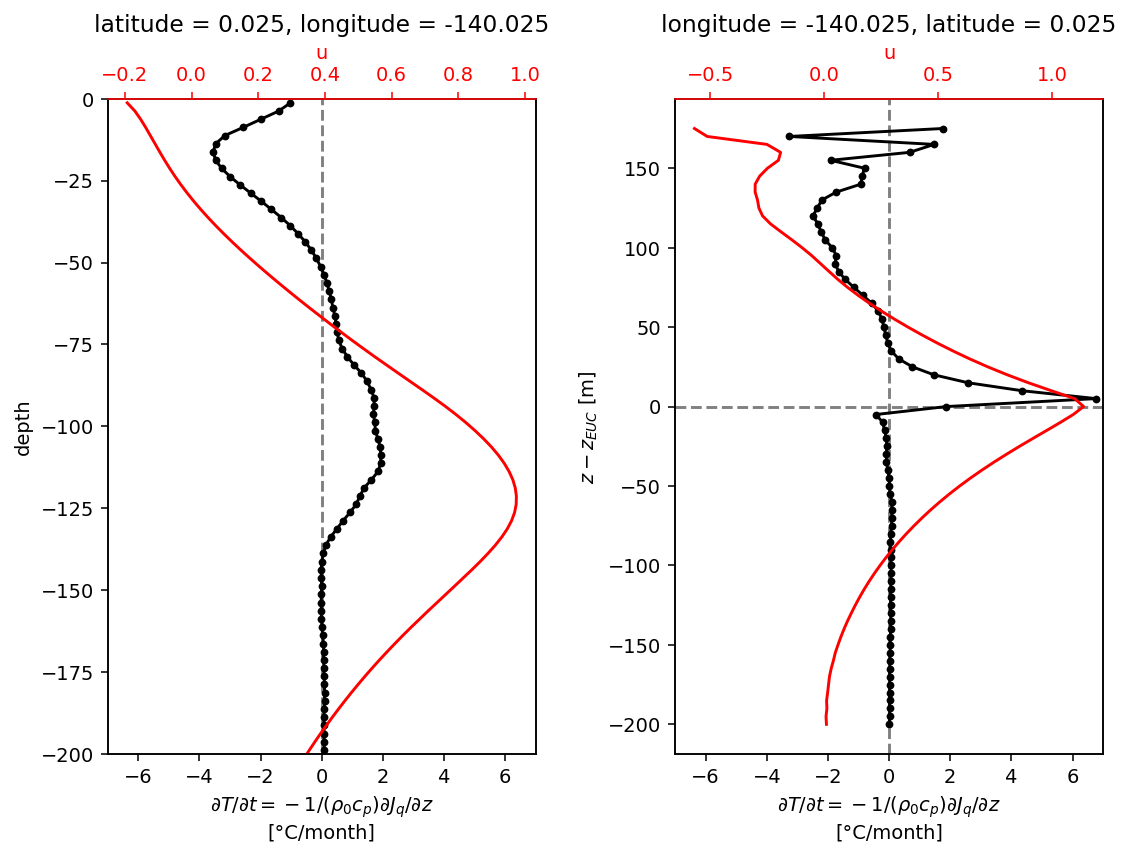

In [ ]:
f, ax = plt.subplots(1, 2, sharex=True, squeeze=True, constrained_layout=True)

plt.sca(ax[0])
station.dTdt.mean("time").plot(marker=".", y="depth", ylim=(-200, 0), color='k')
#station.where(station.depth < -station.KPPhbl).dTdt.mean("time").plot(
#    y="depth", ylim=(-200, 0), xlim=(-5, 5)
#)

# plt.legend(("all data", "below KPPhbl"))
dcpy.plots.linex(0)

ax2 = plt.gca().twiny()
station.u.mean("time").plot(y="depth", ax=ax2, color="r")
dcpy.plots.set_axes_color(ax2, 'r', spine="top")
ax2.set_title("")


plt.sca(ax[1])
(regridded.dTdt).mean("time").plot(marker='.', y="zeuc", xlim=(-7, 7), color='k')
dcpy.plots.linex(0)
dcpy.plots.liney(0)

ax2 = plt.gca().twiny()
regridded.u.mean("time").plot(y="zeuc", ax=ax2, color="r")
dcpy.plots.set_axes_color(ax2, 'r', spine="top")
ax2.set_title("")

plt.gcf().set_size_inches((8, 6))

## Monthly mean depth-time

In [ ]:
(
    np.abs(regridded.Jq).resample(time="M")
    .mean()
    .hvplot.quadmesh(x="time", clim=(-50, 0), width=1200, height=600)
    .opts(fontsize={"ticks": 12, "labels": 14})
)

:QuadMesh   [time,zeuc]   (Jq)

In [ ]:
ts = -1 * regridded.Jq.sel(time=slice("2000", None)).compute()
ts.attrs["long_name"] = "$J_q$"
ts.attrs["units"] = "$W/m²$"

In [ ]:
import colorcet

/glade/u/home/dcherian/python/xarray/xarray/core/nanops.py:143: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


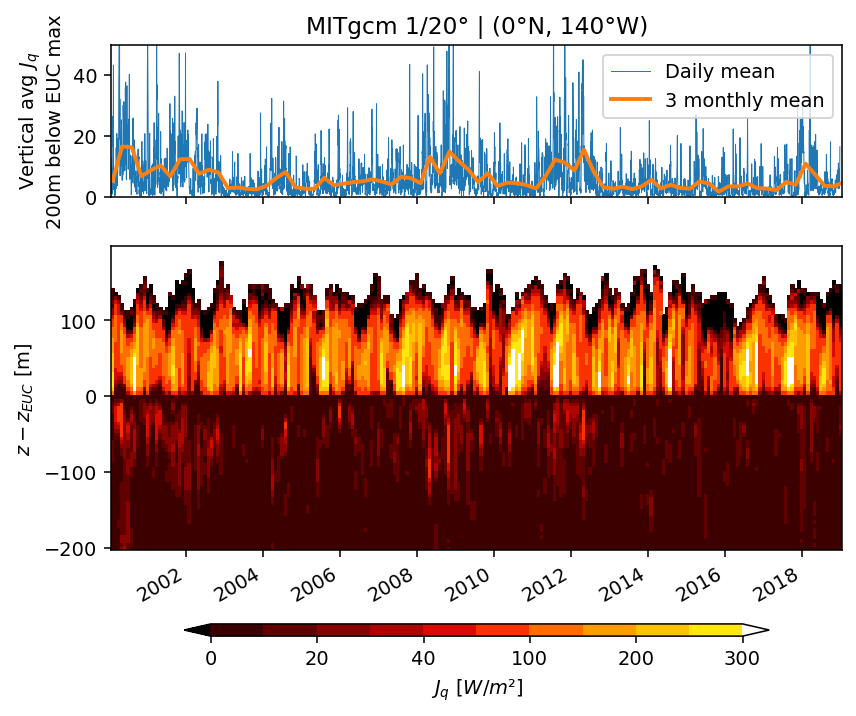

In [ ]:
f, ax = plt.subplots(
    2,
    1,
    sharex=True,
    squeeze=False,
    constrained_layout=True,
    gridspec_kw=dict(height_ratios=[1, 2]),
)

ts.sel(zeuc=slice(0)).resample(time="D").mean().mean("zeuc").plot(lw=0.5, ax=ax[0, 0])
(
    ts.sel(time=slice("2000", None), zeuc=slice(0))
    .resample(time="3M")
    .mean()
    .mean("zeuc")
    .plot(ax=ax[0, 0], lw=2, _labels=False)
)


ts.resample(time="M").mean().plot(
    y="zeuc",
    robust=True,
    levels=[0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300],
    cmap=colorcet.cm.fire,
    ax=ax[1, 0],
    cbar_kwargs={"orientation": "horizontal", "shrink":0.8, "aspect": 40},
)

ax[0, 0].set_title("MITgcm 1/20° | (0°N, 140°W)")
ax[0, 0].set_ylabel("Vertical avg $J_q$\n200m below EUC max")
ax[0, 0].set_ylim([0, 50])
ax[0, 0].legend(["Daily mean", "3 monthly mean"])
ax[1, 0].set_xlabel("")
f.set_size_inches((6, 5))
dcpy.plots.clean_axes(ax)
f.savefig("images/heat-flux-zeuc-0-140.png", dpi=300)

# Hiatus vs. post-hiatus 

Replicate χpod during/after warming hiatus $J_q^t$ distribution plot

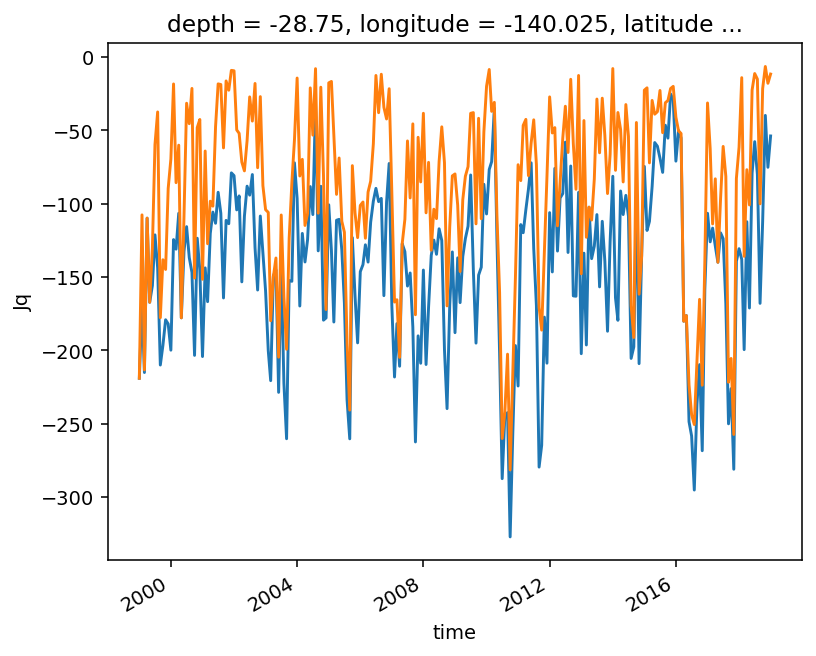

In [ ]:
filtered = Jq.sel(depth=-30, method="nearest")
monthly = filtered.resample(time="M").mean()
monthly.plot()

filtered = filtered.where(station.KPPhbl < np.abs(filtered.depth.values))
monthly = filtered.resample(time="M").mean()
monthly.plot()

Text(0.1, 0.6, '          2005-12    2012-2018\n  npts:   96         84\n  mean:  -93.7      -83.4\nmedian:  -83.0      -62.0')

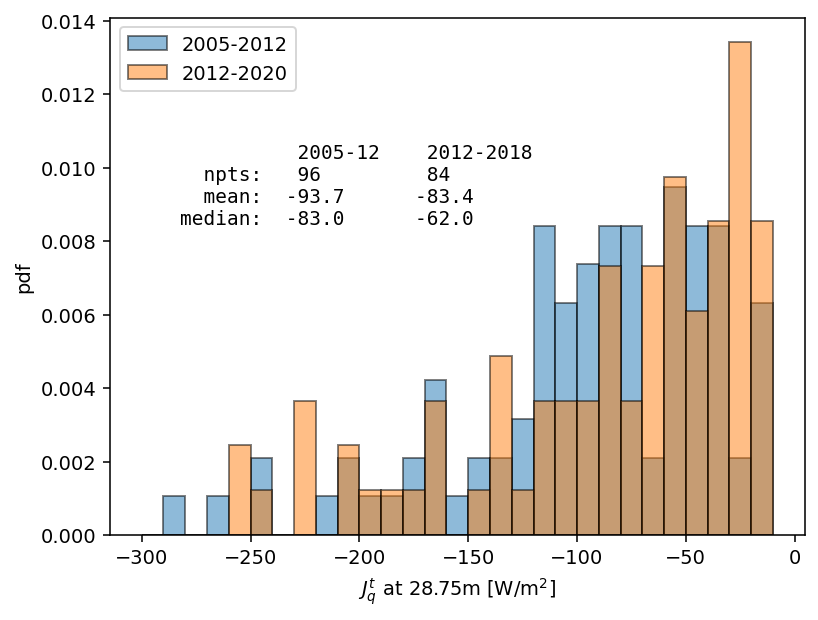

In [ ]:
kwargs = dict(bins=np.arange(-300, 0, 10), density=True, alpha=0.5, edgecolor='k')

p1 = monthly.sel(time=slice("2005", "2011")).compute()
p2 = monthly.sel(time=slice("2012", "2020")).compute()

p1.plot.hist(**kwargs)
p2.plot.hist(**kwargs)
plt.legend(["2005-2011", "2012-2020"])
plt.title("")
plt.ylabel("pdf")
plt.xlabel("$J_q^t$ at 28.75m [W/m$^2$]")


text = (
    "          2005-12    2012-2018\n"
    f"  npts:   {p1.count().values:d}         {p2.count().values:d}\n"
    f"  mean:  {p1.mean().values:.1f}      {p2.mean().values:.1f}\n"
    f"median:  {p1.median().values:.1f}      {p2.median().values:.1f}"
)
plt.text(0.1, 0.6, text, transform=plt.gca().transAxes, fontfamily="monospace")
# plt.gcf().savefig("../images/j1-during-after-hiatus.png", bbox_inches="tight")

### Looks like more TIW driven mixing during hiatus

In [ ]:
# def subset_to_chipod(station, chipod):
    
cpod = chipod.assign_coords(depth=chipod.depth * -1)
station.sel(depth=cpod.depth, method="nearest").assign_coords(depth=cpod.depth)

<xarray.Dataset>
Dimensions:        (depth: 7, time: 175125)
Coordinates:
  * depth          (depth) float64 -29.0 -39.0 -49.0 -59.0 -69.0 -89.0 -119.0
    longitude      float32 -140.025
    latitude       float32 0.025
  * time           (time) datetime64[ns] 1998-12-31T18:00:00 ... 2018-12-23T1...
    zeuc           (depth, time) float32 95.0 95.0 95.0 95.0 ... 10.0 10.0 12.5
Data variables:
    SSH            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    KPPhbl         (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    u              (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    v              (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    w              (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    theta          (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    salt           (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    DFrI_TH        (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    VISrI_Um       (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    VISrI_Vm       (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    KPPdiffKzT     (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    KPPviscAz      (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    KPPg_TH        (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    Jq             (depth, time) float64 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    nonlocal_flux  (depth, time) float64 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    dens           (depth, time) float32 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    mld            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    eucmax         (time) float32 -123.75 -123.75 -123.75 ... -128.75 -131.25
    dJdz           (depth, time) float64 dask.array<chunksize=(7, 6000), meta=np.ndarray>
    dTdt           (depth, time) float64 dask.array<chunksize=(7, 6000), meta=np.ndarray>
Attributes:
    title:     Station profile, index (i,j)=(600,241)
    easting:   longitude
    northing:  latitude

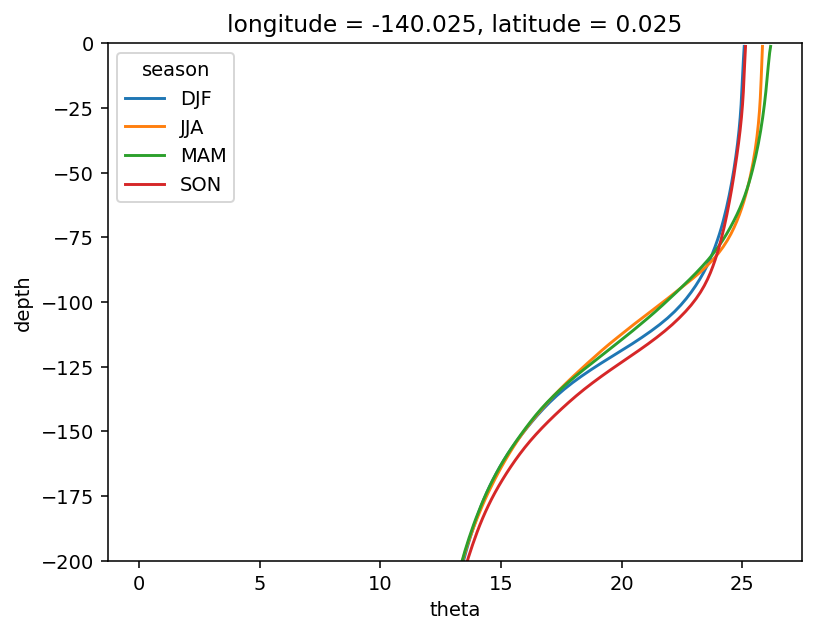

In [ ]:
station.theta.groupby("time.season").mean().plot(hue="season", y="depth", ylim=(-200, 0))

/glade/u/home/dcherian/python/xarray/xarray/core/nanops.py:143: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/u/home/dcherian/python/xarray/xarray/core/nanops.py:143: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


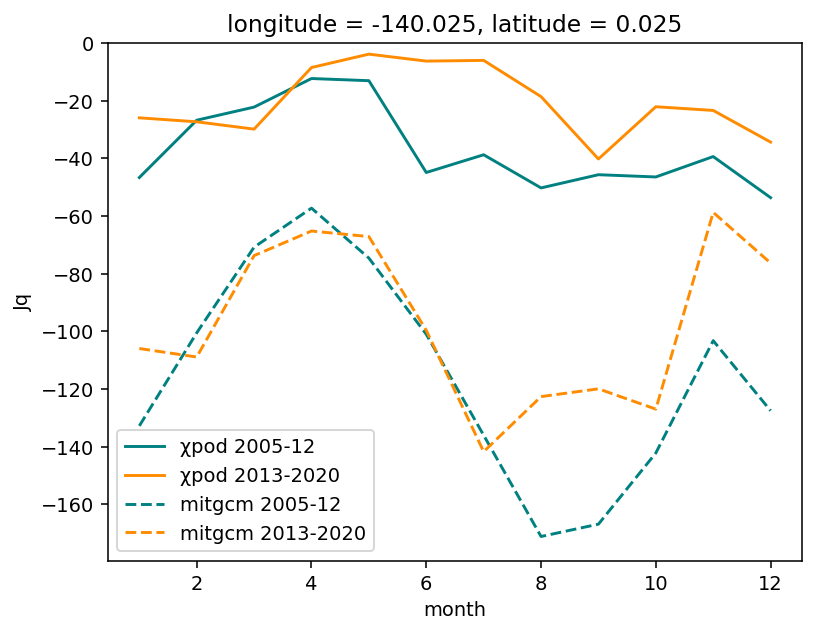

In [ ]:
with plt.rc_context({"axes.prop_cycle": cycler("color", ("teal", "darkorange"))}):

    (
        chipod.Jq.sel(time=slice("2005", "2012"))
        .mean("depth")
        .groupby("time.month")
        .mean()
        .plot()
    )
    (
        chipod.Jq.sel(time=slice("2013", None))
        .mean("depth")
        .groupby("time.month")
        .mean()
        .plot()
    )

    (
        station.Jq.sel(time=slice("2005", "2012"))
        .sel(depth=slice(-120))
        .mean("depth")
        .groupby("time.month")
        .mean()
        .plot(ls="--")
    )
    (
        station.Jq.sel(time=slice("2013", None))
        .sel(depth=slice(-120))
        .mean("depth")
        .groupby("time.month")
        .mean()
        .plot(ylim=(None, 0), ls="--")
    )
    
    plt.legend(("χpod 2005-12", "χpod 2013-2020", "mitgcm 2005-12", "mitgcm 2013-2020"))

## TIW KE

In [ ]:
file = h5py.File("./tiw_0_140W_monthly.mat")
file

/glade/u/home/dcherian/miniconda3/envs/dcpy2/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


<HDF5 file "tiw_0_140W_monthly.mat" (mode r+)>

In [ ]:
file["tiwmo"]["readme"]

<HDF5 dataset "readme": shape (100, 15), type "<u2">

In [ ]:
tiwke = xr.DataArray(
    data=file["tiwmo"]["ke"][:].squeeze(),
    dims="time",
    coords={"time": dcpy.util.mdatenum2dt64(file["tiwmo"]["time"][:].squeeze() - 366)},
    attrs={"long_name": "Monthly TIW KE"}
)

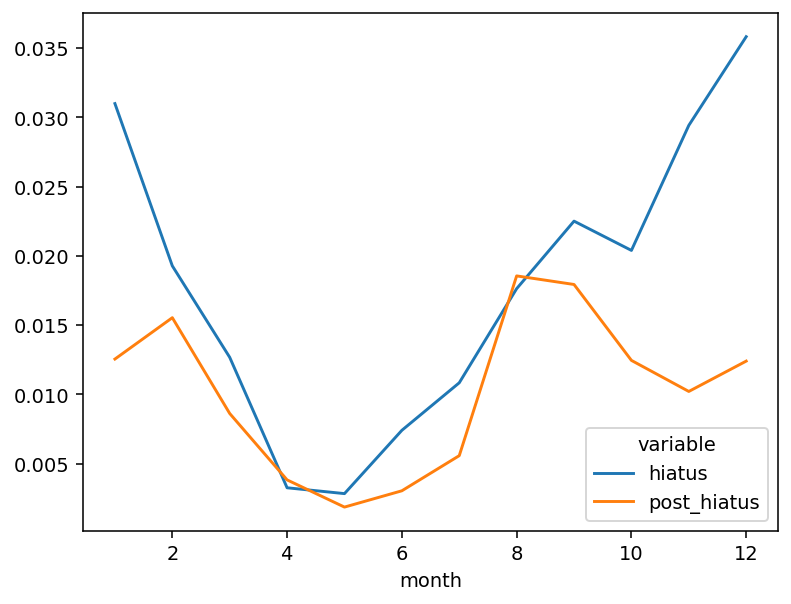

In [ ]:
def decadal_mean(data):
    with xr.set_options(keep_attrs=True):
        decadal_means = xr.Dataset()
        decadal_means["hiatus"] = (
            data.sel(time=slice(None, "2011")).groupby("time.month").mean()
        )
        decadal_means["post_hiatus"] = (
            data.sel(time=slice("2012", None)).groupby("time.month").mean()
        )
    return decadal_means

decadal_tiw = decadal_mean(tiwke)
decadal_tiw.to_array().plot.line(hue="variable")

In [ ]:
tomat("decadal_mean_tiwke_0_140.mat", decadal_tiw)

{'month': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'hiatus': array([0.03098962, 0.0192743 , 0.01267158, 0.0032532 , 0.00283159,
        0.00740125, 0.01083303, 0.01762779, 0.02250288, 0.02039038,
        0.02941715, 0.03581974]),
 'post_hiatus': array([0.0125456 , 0.0155319 , 0.00861715, 0.0038218 , 0.00185856,
        0.00303527, 0.00557189, 0.01854891, 0.01793047, 0.01244967,
        0.0102076 , 0.01239781])}

# Compare to 0, 140 χpod

In [ ]:
import h5py


file = h5py.File(
    "/glade/u/home/dcherian/work/pump/datasets/microstructure/chipods_0_140W_hourly.mat",
    mode="r",
)

chipod = xr.Dataset()

chipod["depth"] = ("depth", file["chr"]["depth"][:].squeeze())
chipod["time"] = ("time", file["chr"]["time"][:].squeeze())
chipod["time"] = dcpy.util.mdatenum2dt64(chipod.time - 366)
for var in ["Jq", "Kt", "N2", "T", "chi", "dTdz", "eps"]:
    chipod[var] = xr.DataArray(file["chr"][var][:, :], dims=("time", "depth"))
chipod = chipod.where(chipod.eps < 1e-5)
chipod

<xarray.Dataset>
Dimensions:  (depth: 7, time: 128756)
Coordinates:
  * depth    (depth) float64 29.0 39.0 49.0 59.0 69.0 89.0 119.0
  * time     (time) datetime64[ns] 2005-09-23T04:30:00 ... 2020-05-31T23:30:00
Data variables:
    Jq       (time, depth) float64 -4.549 nan -0.0657 nan ... nan nan nan nan
    Kt       (time, depth) float64 9.694e-05 nan 1.4e-06 nan ... nan nan nan nan
    N2       (time, depth) float64 3.798e-05 nan 4.135e-05 nan ... nan nan nan
    T        (time, depth) float64 25.56 nan 25.31 nan nan ... nan nan nan nan
    chi      (time, depth) float64 2.708e-08 nan 4.073e-10 nan ... nan nan nan
    dTdz     (time, depth) float64 0.01282 nan 0.01419 nan ... nan nan nan nan
    eps      (time, depth) float64 1.657e-08 nan 2.357e-10 nan ... nan nan nan

**check that time is right**

"Three xpods were deployed by National Oceanic
and Atmospheric Administration (NOAA) personnel
aboard the R/V Ka’imimoana on the TAO mooring at 08,
1408W on 22 September 2005 and recovered on 16
January 2006. "

In [ ]:
chipod.time[0]

<xarray.DataArray 'time' ()>
array('2005-09-23T04:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2005-09-23T04:30:00

In [ ]:
resampler = {"time": "M"}

merged = xr.Dataset()

merged["model"] = (
    station.Jq.assign_coords(depth=np.abs(station.depth))
    .reindex(depth=chipod.depth, method="nearest")
    .resample(resampler)
    .mean()
)

merged["χpod"] = chipod.Jq.resample(resampler).mean()
merged.coords["month"] = merged.time.dt.month
merged.load()

/glade/u/home/dcherian/python/xarray/xarray/core/nanops.py:143: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (depth: 7, time: 241)
Coordinates:
  * time       (time) datetime64[ns] 1998-12-31 1999-01-31 ... 2018-12-31
  * depth      (depth) float64 29.0 39.0 49.0 59.0 69.0 89.0 119.0
    longitude  float32 -140.025
    latitude   float32 0.025
    month      (time) int64 12 1 2 3 4 5 6 7 8 9 10 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    model      (depth, time) float64 -218.9 -153.3 -214.8 ... -3.77 -80.86
    χpod       (time, depth) float64 nan nan nan nan ... nan -26.8 -41.1 -19.27

In [ ]:
merged[["model", "χpod"]].to_array().groupby("time.year")

DataArrayGroupBy, grouped over 'year' 
21 groups with labels 1998, 1999, 2000, ..., 2017, 2018.

In [ ]:
merged["model"] /= 2.5

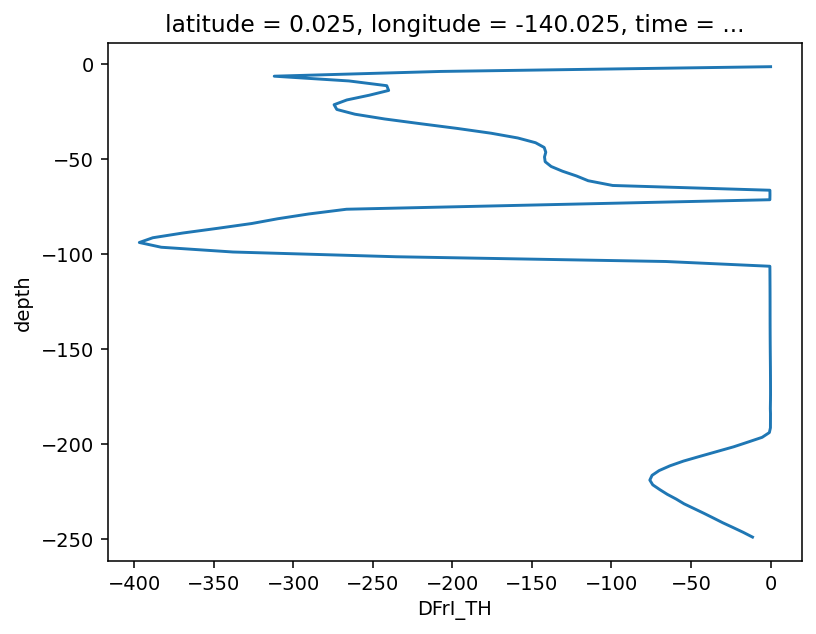

In [ ]:
(station.DFrI_TH * 1035*3994/3e7).isel(time=1, depth=slice(0, 100)).plot(y="depth")

ValueError: could not broadcast input array from shape (100,7) into shape (100)

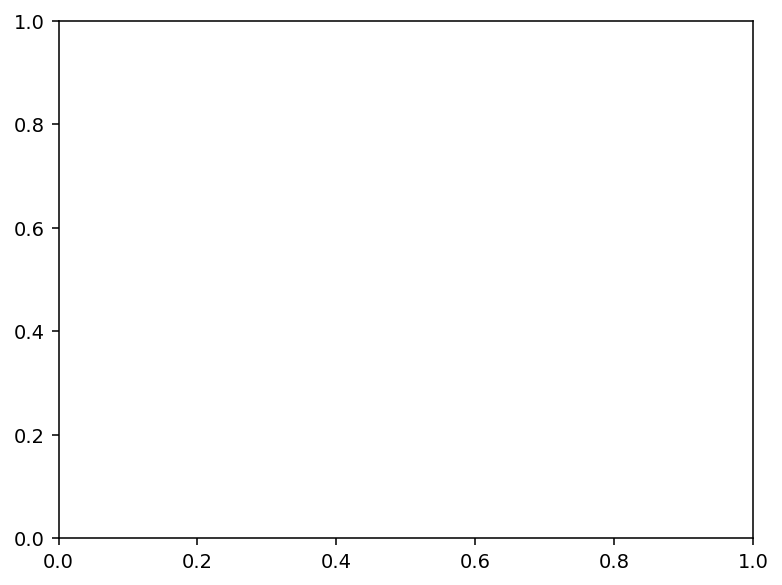

In [ ]:
chipod.Jq.isel(time=slice(100)).plot.step(hue="depth")

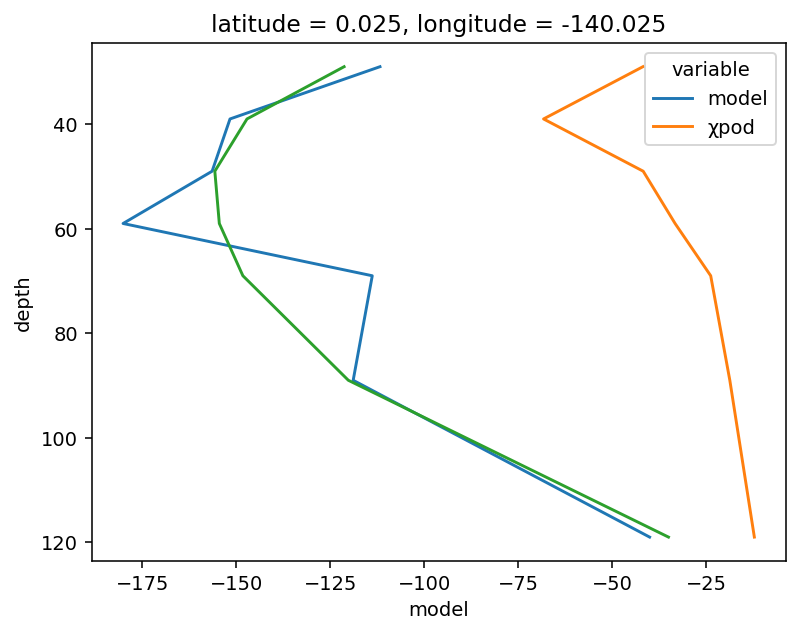

In [ ]:
merged.where(merged.χpod.notnull()).mean("time").to_array().plot(
    hue="variable", y="depth", yincrease=False
)
merged.model.mean("time").plot(y="depth")

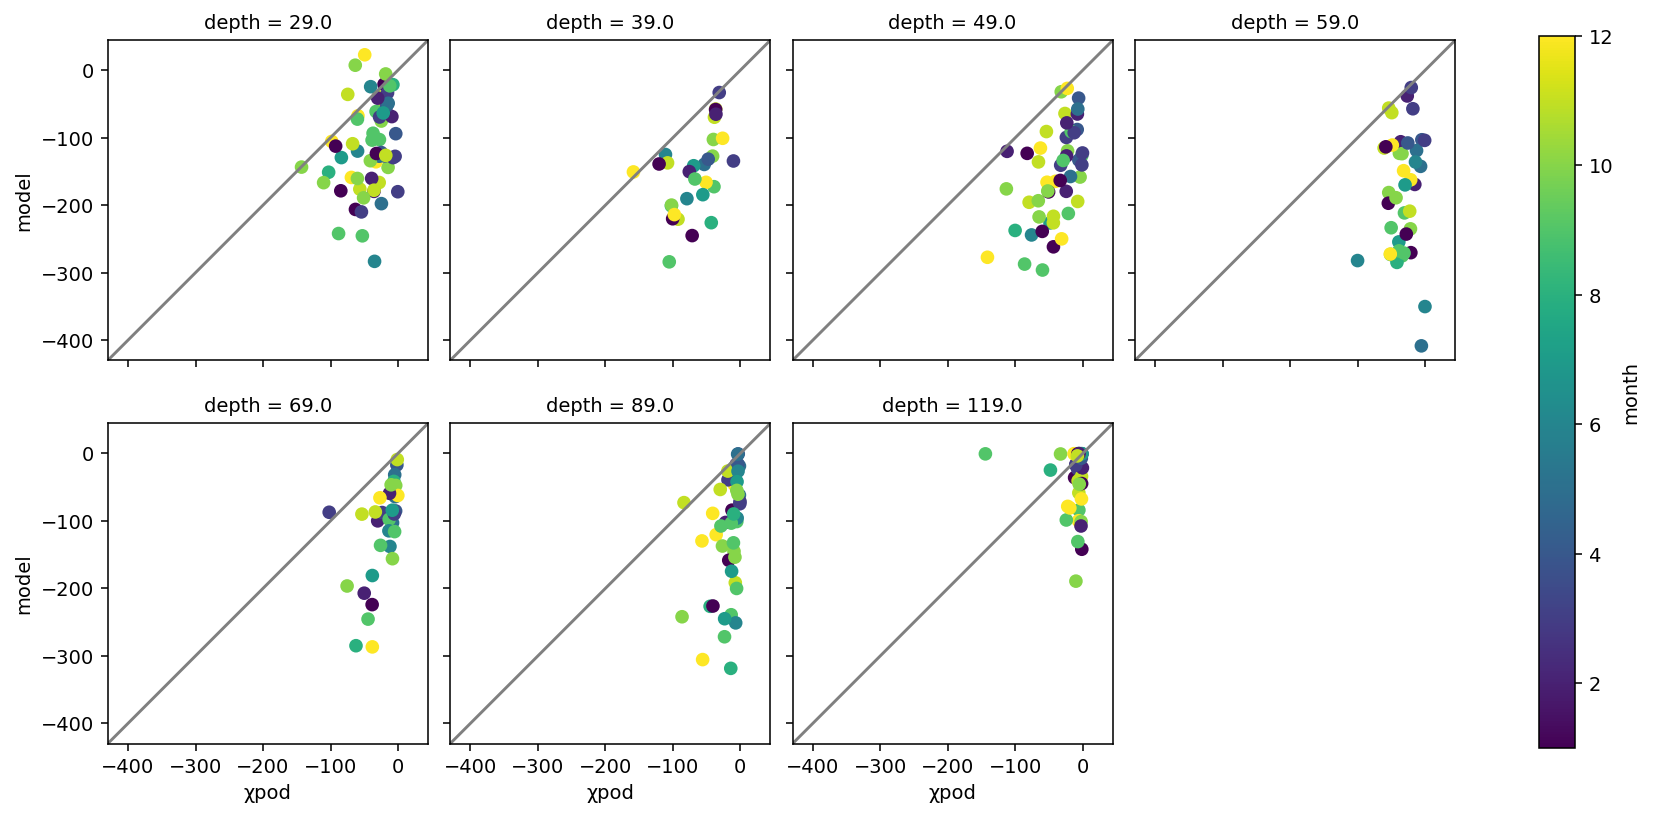

In [ ]:
fg = merged.plot.scatter(
    x="χpod", y="model", col="depth", hue="month", col_wrap=4, 
)
fg.map(dcpy.plots.line45)

/glade/u/home/dcherian/python/xarray/xarray/core/nanops.py:143: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


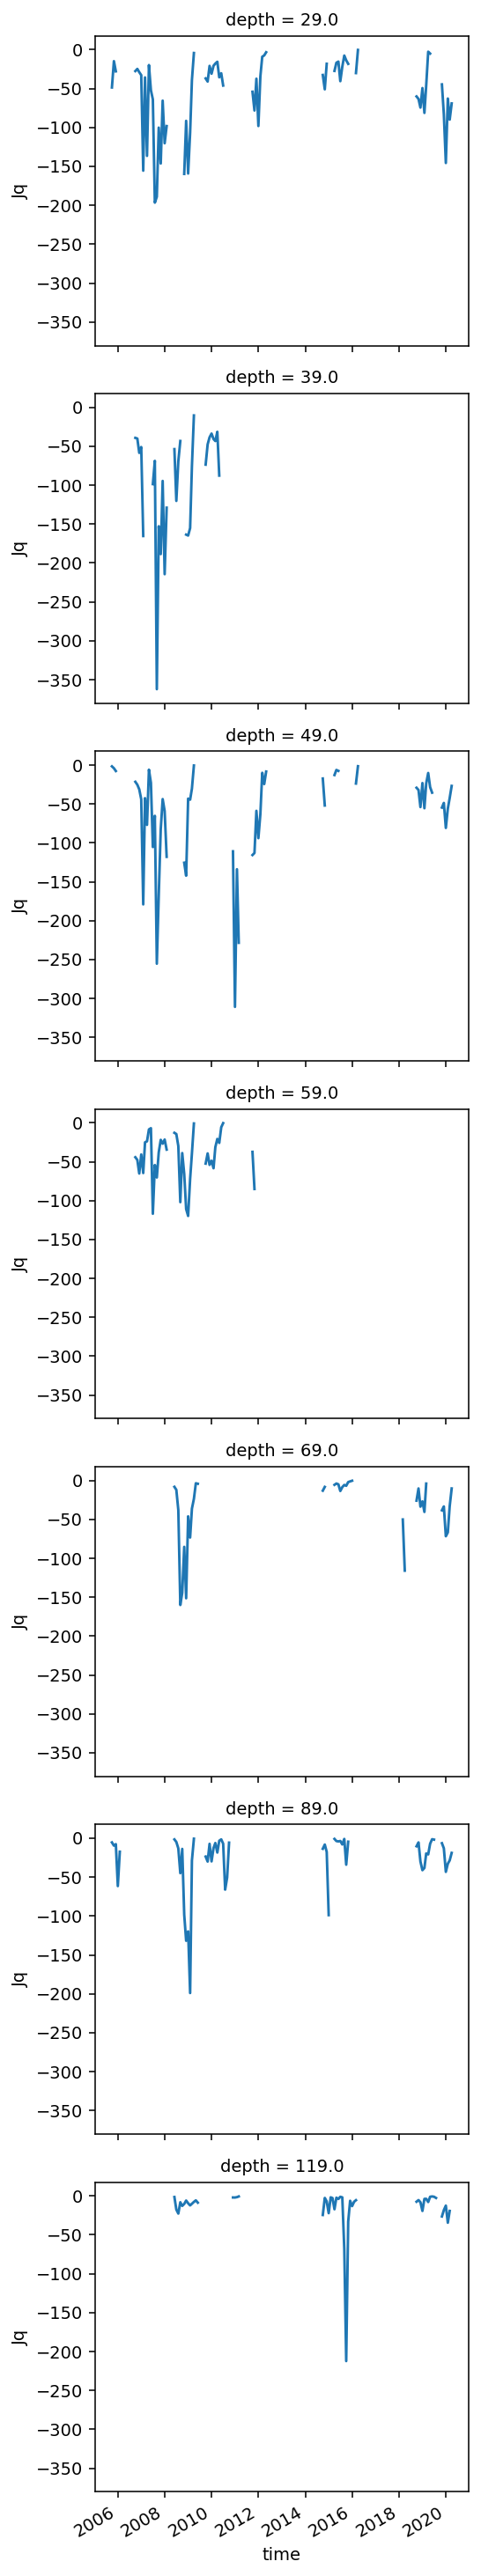

In [ ]:
chipod.Jq.resample(time="M").mean().plot(row="depth")

# Data products for Jim:

In [ ]:
def tomat(file, obj, write=True):
    from scipy.io import savemat

    if isinstance(obj, xr.DataArray):
        obj = obj.to_dataset()
        
    d = {k: v.values for k, v in obj.variables.items()}
    savemat(file, d)
    return d


## Average heat flux profiles

In [ ]:
station11 = pump.model.model.read_stations_20(
    "/glade/u/home/dcherian/pump/TPOS_MITgcm_fix3/", "*_0.05*110.000*.nc", dayglobstr="*", 
)
station11

<xarray.Dataset>
Dimensions:        (depth: 185, time: 175125)
Coordinates:
  * depth          (depth) float32 -1.25 -3.75 -6.25 ... -5658.0986 -5758.0986
    longitude      float32 -110.025
    latitude       float32 0.025
  * time           (time) datetime64[ns] 1998-12-31T18:00:00 ... 2018-12-23T1...
    zeuc           (depth, time) float32 62.5 62.5 ... -5659.3486 -5659.3486
Data variables:
    SSH            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    KPPhbl         (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    u              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    v              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    w              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    theta          (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    salt           (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    DFrI_TH        (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    VISrI_Um       (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    VISrI_Vm       (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPdiffKzT     (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPviscAz      (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPg_TH        (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    Jq             (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    nonlocal_flux  (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    dens           (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    mld            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    eucmax         (time) float32 -63.75 -63.75 -63.75 ... -93.75 -98.75 -98.75
    dJdz           (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    dTdt           (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
Attributes:
    title:     Station profile, index (i,j)=(1200,241)
    easting:   longitude
    northing:  latitude

In [ ]:
station14 = pump.model.model.read_stations_20(
    "/glade/u/home/dcherian/pump/TPOS_MITgcm_fix3/", "*_0.05*140.000*.nc", dayglobstr="*", 
)
station14

<xarray.Dataset>
Dimensions:        (depth: 185, time: 175125)
Coordinates:
  * depth          (depth) float32 -1.25 -3.75 -6.25 ... -5658.0986 -5758.0986
    longitude      float32 -140.025
    latitude       float32 0.025
  * time           (time) datetime64[ns] 1998-12-31T18:00:00 ... 2018-12-23T1...
    zeuc           (depth, time) float32 122.5 122.5 ... -5629.3486 -5626.8486
Data variables:
    SSH            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    KPPhbl         (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    u              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    v              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    w              (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    theta          (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    salt           (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    DFrI_TH        (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    VISrI_Um       (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    VISrI_Vm       (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPdiffKzT     (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPviscAz      (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    KPPg_TH        (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    Jq             (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    nonlocal_flux  (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    dens           (depth, time) float32 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    mld            (time) float32 dask.array<chunksize=(6000,), meta=np.ndarray>
    eucmax         (time) float32 -123.75 -123.75 -123.75 ... -128.75 -131.25
    dJdz           (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
    dTdt           (depth, time) float64 dask.array<chunksize=(185, 6000), meta=np.ndarray>
Attributes:
    title:     Station profile, index (i,j)=(600,241)
    easting:   longitude
    northing:  latitude

In [ ]:
station = xr.concat([station11, station14], "longitude", join="exact")

In [ ]:
means = station.mean("time").sel(depth=slice(-200)).Jq.compute()

In [ ]:
tomat("mitgcm-110-140-mean-Jq.mat", means)

## decadal means χpod @ 29m

In [ ]:
chi29 = xr.Dataset()

for var in ["Jq", "Kt", "N2", "T", "chi", "dTdz", "eps"]:
    chi29[var] = xr.DataArray(file["chr"]["chi29"][var][:, :].squeeze(), dims=("time",))

chi29 = chi29.where(chi29.eps < 1e-5)
chi29["time"] = chipod.time

In [ ]:
Jq = chi29.Jq
Jq = Jq.where(Jq < 0)

decadal_means = xr.Dataset()
decadal_means["hiatus"] = (
    Jq.sel(time=slice(None, "2011")).groupby("time.month").mean()
)
decadal_means["post_hiatus"] = (
    Jq.sel(time=slice("2012", None)).groupby("time.month").mean()
)
decadal_means

<xarray.Dataset>
Dimensions:      (month: 12)
Coordinates:
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    hiatus       (month) float64 -64.97 -30.87 -33.63 ... -54.4 -39.63 -57.34
    post_hiatus  (month) float64 -56.74 -42.83 -20.48 ... -48.66 -68.47 -102.4

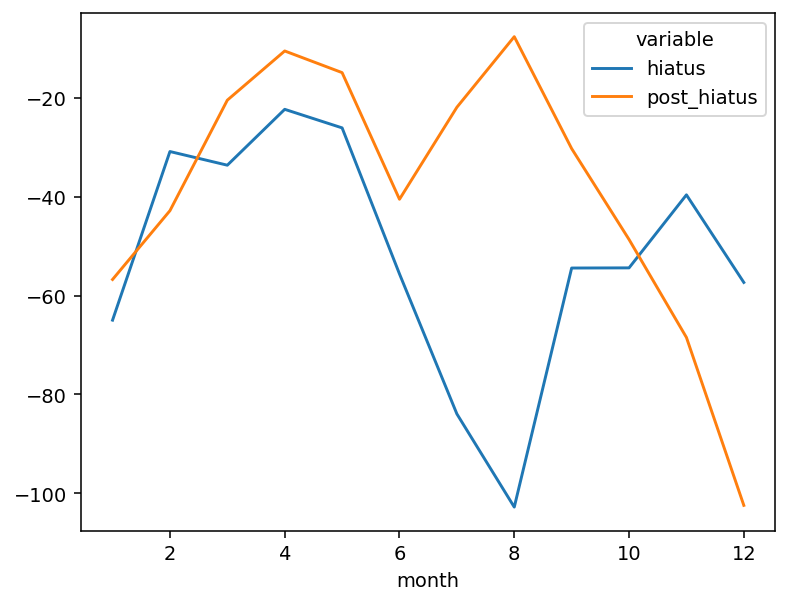

In [ ]:
decadal_means.to_array().plot(hue="variable")

In [ ]:
tomat("decadal-avg-chipod140-29m.mat", decadal_means)

{'month': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'hiatus': array([ -64.96935289,  -30.86981889,  -33.63236139,  -22.33436805,
         -26.08673296,  -55.62080644,  -83.92796279, -102.77183549,
         -53.85568202,  -54.39562663,  -39.59980381,  -57.2826968 ]),
 'post_hiatus': array([ -56.74463156,  -42.8290883 ,  -20.4817402 ,  -10.534097  ,
         -14.54379437,  -40.520018  ,  -21.9168809 ,   -7.57830837,
         -29.73997335,  -48.6335654 ,  -67.11801429, -102.42196159])}

## remake anna's plot

In [ ]:
anna0 = xr.open_mfdataset("../datasets/anna_*.nc").load()
anna0

<xarray.Dataset>
Dimensions:   (z_t: 62, z_w_bot: 62)
Coordinates:
    TLAT      float64 -0.05
    TLONG     float64 220.0
    ULAT      float64 0.0
    ULONG     float64 -140.0
  * z_w_bot   (z_w_bot) float32 1000.0 2000.0 3000.0 ... 574999.06 599999.06
  * z_t       (z_t) float32 500.0 1500.0 2500.0 ... 537500.0 562499.06 587499.06
Data variables:
    Jq_EN     (z_w_bot) float64 81.79 92.55 83.93 74.29 64.2 ... nan nan nan nan
    Jq_LN     (z_w_bot) float64 135.6 170.2 168.4 156.5 ... nan nan nan nan
    Jq_N      (z_w_bot) float64 110.2 133.3 125.9 113.4 ... nan nan nan nan
    T_EN      (z_t) float32 27.838518 27.802313 27.76542 ... nan nan nan
    T_LN      (z_t) float32 24.72866 24.682892 24.63294 24.53296 ... nan nan nan
    T_N       (z_t) float32 26.270609 26.227806 26.189596 ... nan nan nan
    kappa_EN  (z_w_bot) float32 264.02277 278.5223 178.8874 ... nan nan nan
    kappa_LN  (z_w_bot) float32 274.261 268.5759 178.27542 ... nan nan nan
    kappa_N   (z_w_bot) float32 289.50812 298.65405 203.62425 ... nan nan nan

In [ ]:
anna = xr.Dataset()
for var in ["T", "kappa", "Jq"]:
    anna[var] = (
        anna0[[var + "_" + v for v in ["EN", "N", "LN"]]]
        .reset_coords(drop=True)
        .to_array(dim="phase")
        .assign_coords(phase=["El-Nino", "neutral", "La Nina"])
    )
with xr.set_options(keep_attrs=True):
    for var in anna.cf[["vertical"]].coords:
        anna[var] = anna[var] / 100
        anna[var].attrs
        anna[var].attrs["units"] = "m"

anna["dTdz"] = (
    ("phase", "z_w_bot"),
    -1
    * (anna.T.cf.diff("Z") / anna.T.cf["Z"].cf.diff("Z")).cf.reindex(Z=anna.T.cf["Z"]),
)
anna["T"] = xr.DataArray(
    (anna.T.values[:, :-1] + anna.T.values[:, 1:]) / 2,
    dims=("phase", "z_w_bot"),
    coords={"z_w_bot": anna.z_w_bot[:-1]},
).reindex(z_w_bot=anna.z_w_bot)
anna["kappa"] /= 1e4
anna = anna.drop_vars("z_t")
anna

<xarray.Dataset>
Dimensions:  (phase: 3, z_w_bot: 62)
Coordinates:
  * phase    (phase) object 'El-Nino' 'neutral' 'La Nina'
  * z_w_bot  (z_w_bot) float64 10.0 20.0 30.0 40.0 ... 5.5e+03 5.75e+03 6e+03
Data variables:
    T        (phase, z_w_bot) float32 27.820415 27.783867 27.723377 ... nan nan
    kappa    (phase, z_w_bot) float32 0.026402276 0.027852232 ... nan nan
    Jq       (phase, z_w_bot) float64 81.79 92.55 83.93 74.29 ... nan nan nan
    dTdz     (phase, z_w_bot) float32 nan 0.003620529 0.0036891936 ... nan nan

In [ ]:
tomat("anna-enso-phase-averages.mat", anna.rename({"z_w_bot": "depth"}))

{'phase': array(['El-Nino', 'neutral', 'La Nina'], dtype=object),
 'T': array([[27.820415  , 27.783867  , 27.723377  , 27.58113   , 27.288563  ,
         26.842377  , 26.311432  , 25.693325  , 24.956217  , 24.123466  ,
         23.172085  , 22.089064  , 20.922974  , 19.759201  , 18.675762  ,
         17.692385  , 16.789417  , 15.941334  , 15.139484  , 14.392508  ,
         13.717297  , 13.097132  , 12.510815  , 11.949193  , 11.415127  ,
         10.925711  , 10.474105  , 10.040678  ,  9.600596  ,  9.132828  ,
          8.653975  ,  8.191311  ,  7.7545857 ,  7.331159  ,  6.8955755 ,
          6.432084  ,  5.9393263 ,  5.418887  ,  4.865141  ,  4.288996  ,
          3.7327209 ,  3.240518  ,  2.8251853 ,  2.4769046 ,  2.1866703 ,
          1.9530419 ,  1.7707793 ,  1.6234819 ,  1.5053442 ,  1.4021589 ,
          1.3073125 ,  1.2220669 ,  1.1379945 ,  1.0471302 ,  0.9646184 ,
                 nan,         nan,         nan,         nan,         nan,
                 nan,         nan],
     

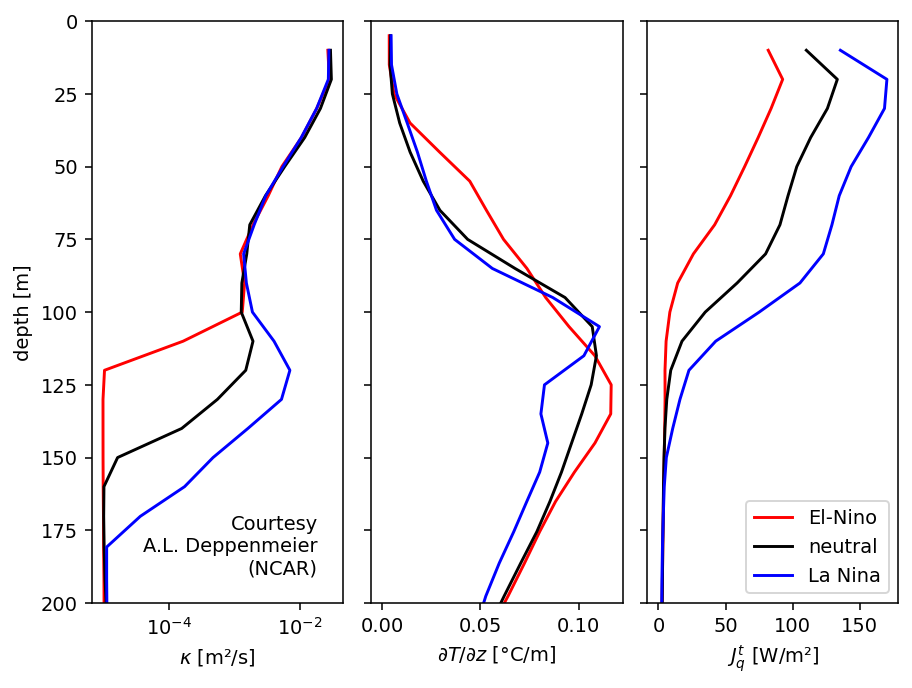

In [ ]:
with plt.rc_context({"axes.prop_cycle": cycler("color", ("r", "k", "b"))}):
    f, axx = plt.subplots(1, 3, sharey=True, constrained_layout=True)
    names = ["kappa", "dTdz", "Jq"]
    labels = ["$κ$ [m²/s]", "$∂T/∂z$ [°C/m]", "$J_q^t$ [W/m²]"]
    ax = dict(zip(names, axx))

    for var, label in zip(names, labels):
        ydim = set(anna[var].dims) - set(("phase",))
        anna[var].plot(
            ax=ax[var],
            hue="phase",
            y=ydim.pop(),
            yincrease=False,
            ylim=(200, 0),
            add_legend=False,
        )
        ax[var].set_xlabel(label)
    ax["kappa"].set_xscale("log")
    axx[0].set_ylabel("depth [m]")
    dcpy.plots.clean_axes(axx)
    axx[-1].legend(anna.phase.values)
    axx[0].text(
        0.9, 0.05, "Courtesy\nA.L. Deppenmeier\n(NCAR)", ha="right", transform=axx[0].transAxes
    )
    
    f.savefig("images/anna-enso-means.png", dpi=300)